# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

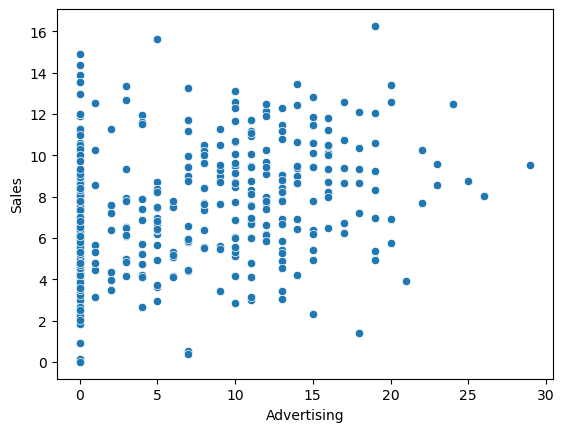

In [4]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

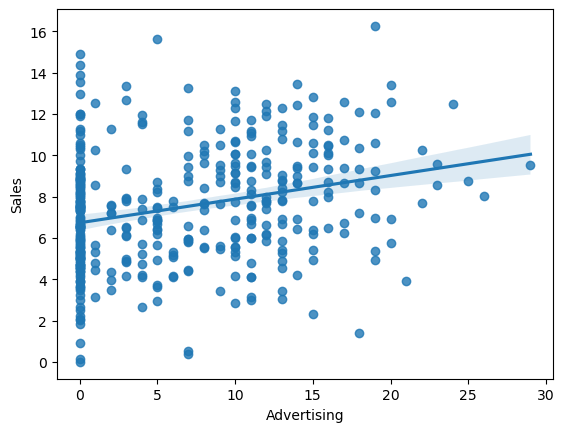

In [5]:
sns.regplot(x=var, y = target, data = data)
plt.show()

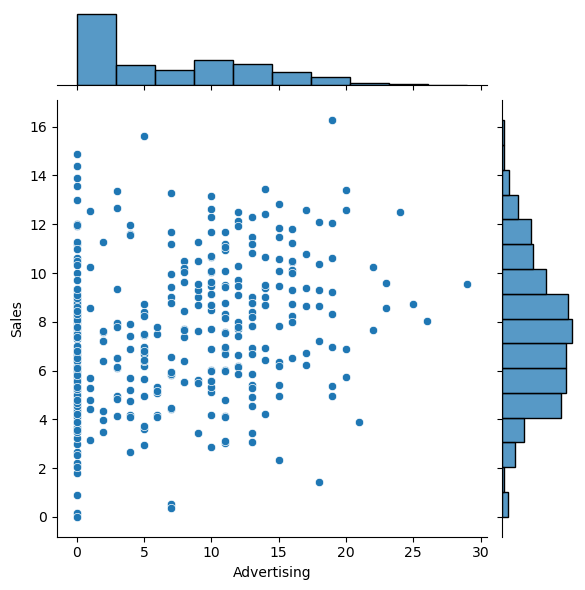

In [6]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [7]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

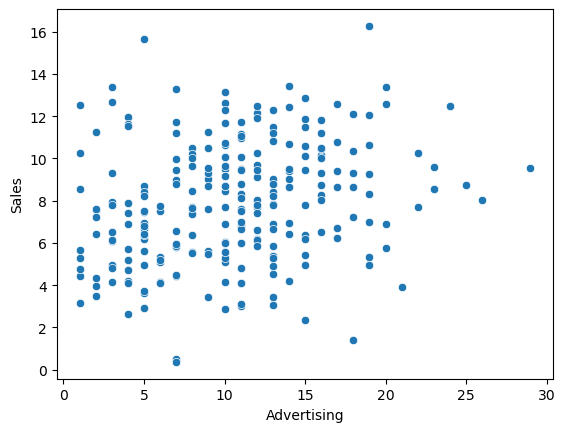

In [8]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [9]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

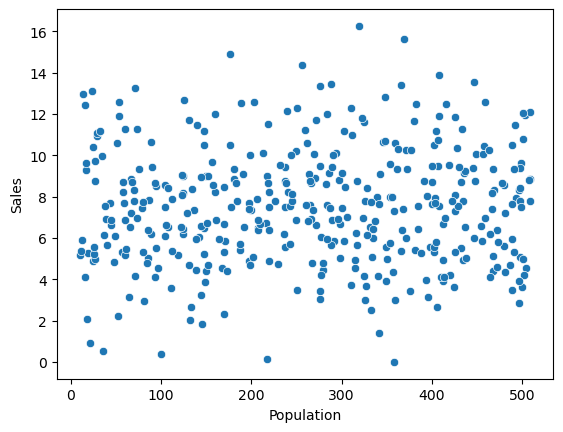

In [10]:
var = 'Population'
sns.scatterplot(x=var, y=target, data=data)
plt.show()

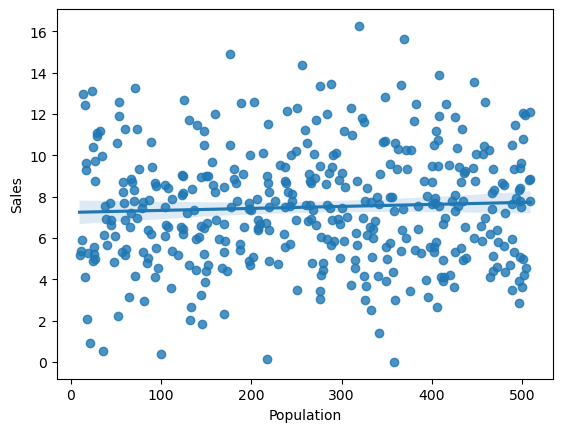

In [11]:
sns.regplot(x=var,y=target,data=data)
plt.show()

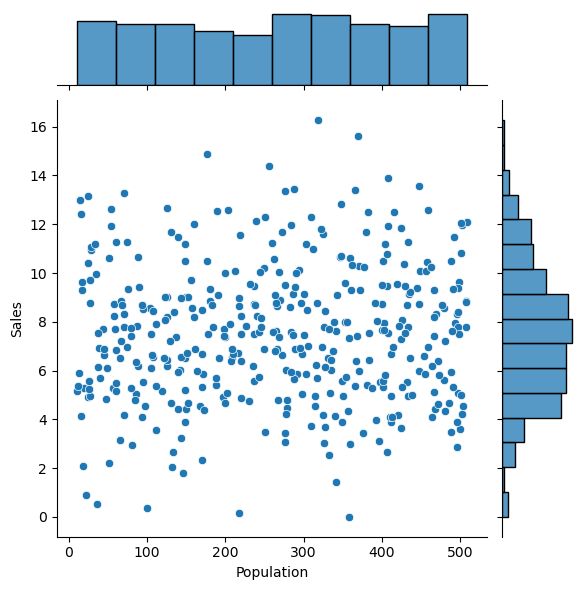

In [12]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [14]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.0504709844720392, p-value : 0.3139816093190483


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
상관계수도 0에 가깝고, p-value도 0.05보다 크기때문에 상관관계이 없다.

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

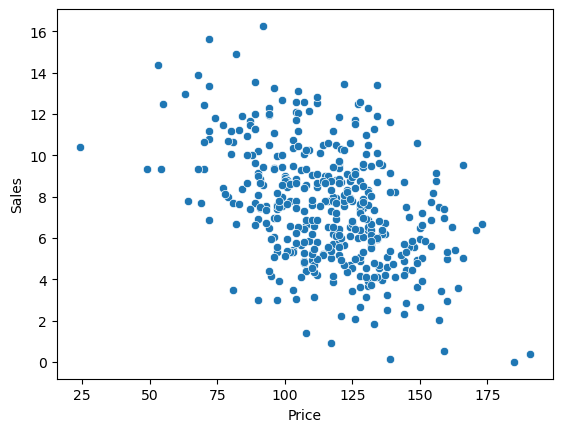

In [16]:
var = 'Price'
sns.scatterplot(x=var, y=target, data=data)
plt.show()

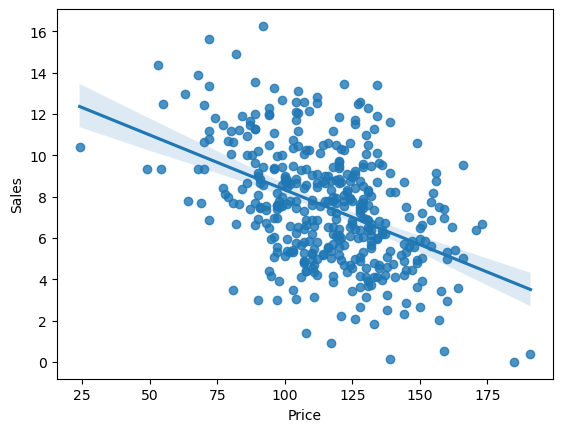

In [17]:
sns.regplot(x=var,y=target,data=data)
plt.show()

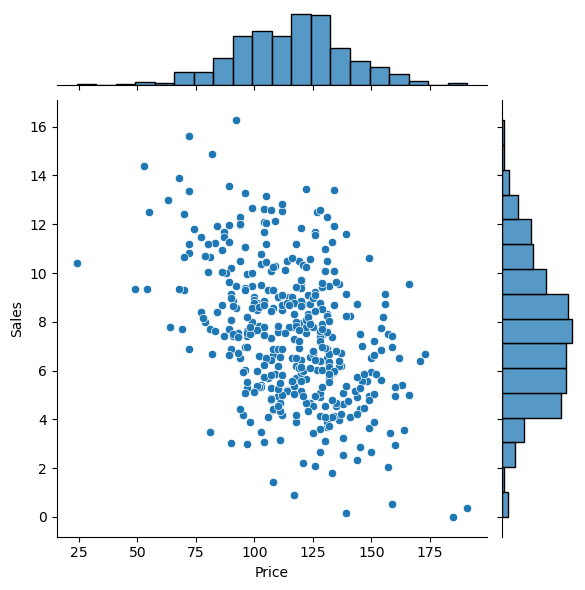

In [18]:
sns.jointplot(x=var,y=target,data=data)
plt.show()

2) 수치화 : 상관분석

In [19]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4449507278465726, p-value : 7.618187011913169e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
음의 방향으로 직선형태가 있고, p-value가 0.05보다 작은 거의 0이고, 상관계수의 절대값이 약0.44로 가격과 판매량의 상관관계가 있다.

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

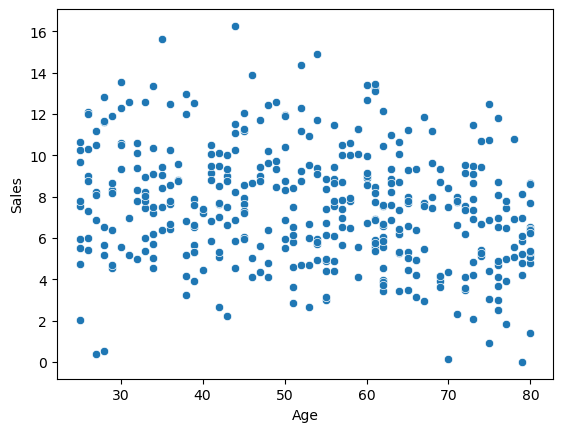

In [20]:
var = 'Age'

sns.scatterplot(x=var,y=target,data=data)
plt.show()

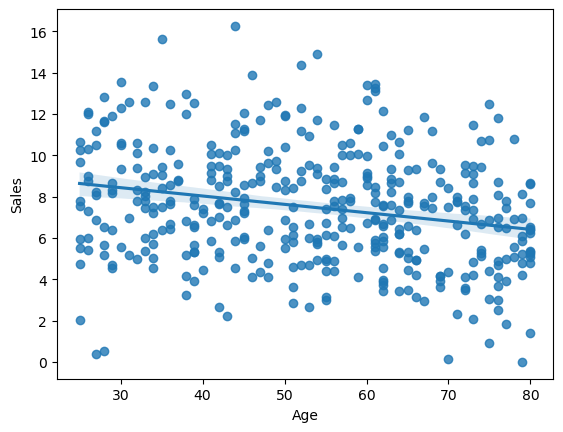

In [21]:
sns.regplot(x=var,y=target,data=data)
plt.show()

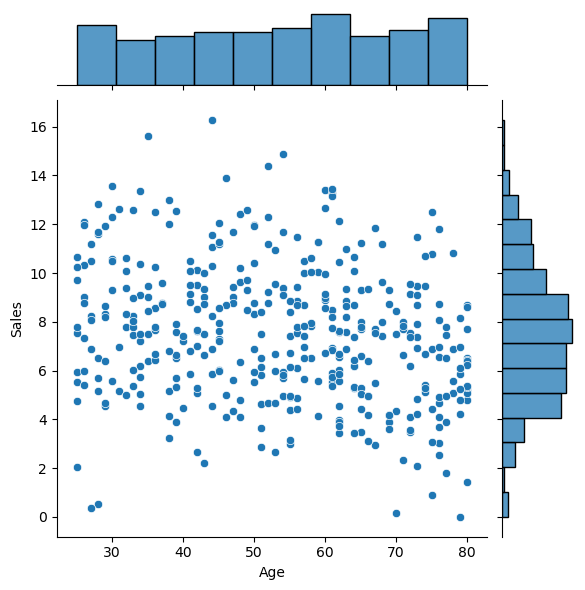

In [22]:
sns.jointplot(x=var,y=target,data=data)
plt.show()

2) 수치화 : 상관분석

In [23]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.2318154396045765, p-value : 2.7889498393714038e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Urban        400 non-null    object 
 9   US           400 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB


### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

<Axes: xlabel='CompPrice', ylabel='Sales'>

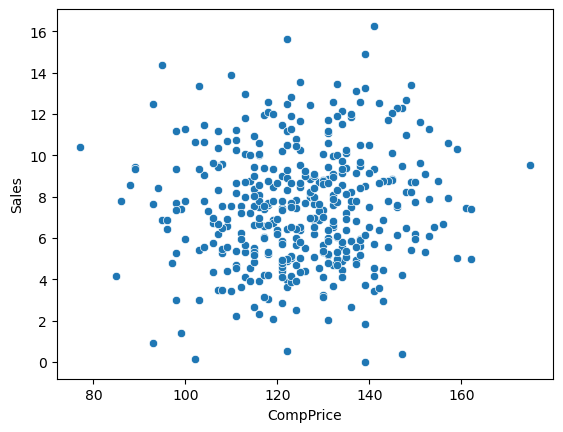

In [8]:
var = 'CompPrice'
sns.scatterplot(x=var, y=target, data=data)

<Axes: xlabel='CompPrice', ylabel='Sales'>

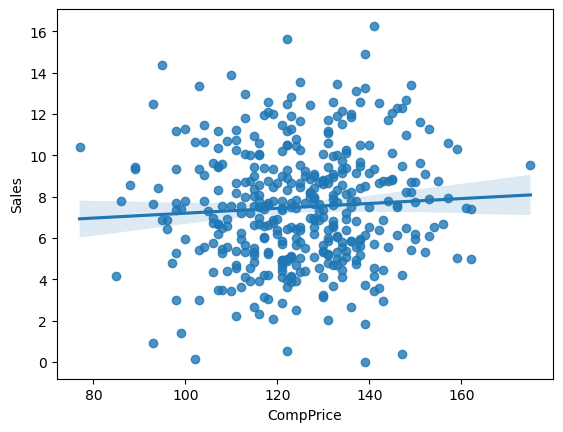

In [9]:
sns.regplot(x=var, y=target, data=data)

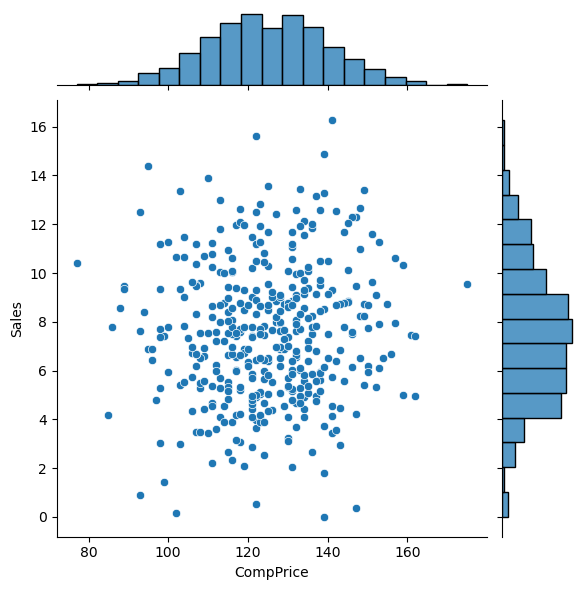

In [10]:
sns.jointplot(x=var, y=target, data=data)

2) 수치화 : 상관분석

In [11]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062152, p-value : 0.20093982894184007


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## **3.범주형 X --> Y**

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

In [ ]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [ ]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

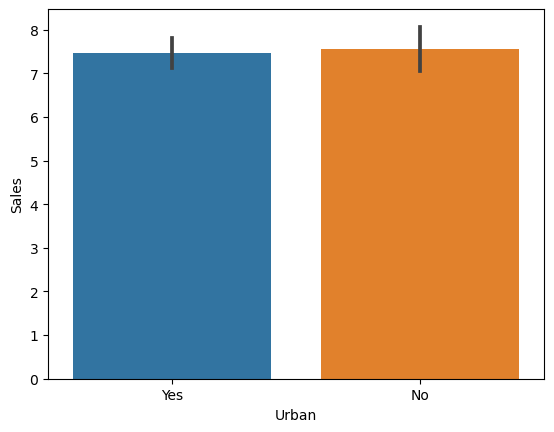

In [12]:
var = 'Urban'
sns.barplot(x=var, y=target,data=data)
plt.show()

2) 수치화 : t-test, anova

In [ ]:
ub_y = data.loc[data[var]=='Yes', target]
ub_n = data.loc[data[var]=='No',target]
result = sprt.ttest(ub_y,ub_n)


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

2) 수치화 : t-test, anova

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## **4.관계 정리하기**

① 강한관계

② 중간관계

③ 관계없음